In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
path = "/content/drive/MyDrive/IPL/training_dataset/DataSet/IPL_Ball_by_Ball_2008_2022.csv"
path2="/content/drive/MyDrive/IPL/training_dataset/DataSet/IPL_Matches_Result_2008_2022.csv"
df = pd.read_csv(path)
df2=pd.read_csv(path2)

In [ ]:
mapping2 = {
    "Wankhede Stadium":"Wankhede Stadium",
    "Wankhede Stadium, Mumbai":"Wankhede Stadium",
    "MA Chidambaram Stadium, Chepauk":"MA Chidambaram Stadium",
    "MA Chidambaram Stadium":"MA Chidambaram Stadium",
    "MA Chidambaram Stadium, Chepauk, Chennai":"MA Chidambaram Stadium",
    "M Chinnaswamy Stadium":"M.Chinnaswamy Stadium",
    "M.Chinnaswamy Stadium":"M.Chinnaswamy Stadium",
    "Eden Gardens, Kolkata":"Eden Gardens",
    "Feroz Shah Kotla":"Arun Jaitley Stadium",
    "Arun Jaitley Stadium":"Arun Jaitley Stadium",
    "Sardar Patel Stadium, Motera":"Narendra Modi Stadium"
}

In [ ]:
df.drop(columns=['non-striker',
                 'extra_type',
                 'extras_run',
                 'non_boundary',
                 'isWicketDelivery'	,
                 'player_out'	,
                 'kind'	,
                 'fielders_involved'],inplace=True)

In [ ]:
df=df[df['overs']<=6]
df=df[df['innings']<=2]

In [ ]:
total_df = df.groupby(['ID','innings']).sum()['total_run'].reset_index()
total_df

<ipython-input-7-4669b1e5a7d0>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  total_df = df.groupby(['ID','innings']).sum()['total_run'].reset_index()


,ID,innings,total_run
0,335982,1,68
1,335982,2,33
2,335983,1,62
3,335983,2,69
4,335984,1,44
...,...,...,...
1893,1312198,2,67
1894,1312199,1,52
1895,1312199,2,77
1896,1312200,1,54


In [ ]:
df = df.merge(total_df,on=['ID','innings'])

In [ ]:
df


,ID,innings,overs,ballnumber,batter,bowler,batsman_run,total_run_x,BattingTeam,total_run_y
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,0,0,Rajasthan Royals,54
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,0,1,Rajasthan Royals,54
2,1312200,1,0,3,JC Buttler,Mohammed Shami,1,1,Rajasthan Royals,54
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,0,0,Rajasthan Royals,54
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,0,0,Rajasthan Royals,54
...,...,...,...,...,...,...,...,...,...,...
82587,335982,2,6,4,MV Boucher,AB Agarkar,0,1,Royal Challengers Bangalore,33
82588,335982,2,6,5,MV Boucher,AB Agarkar,0,1,Royal Challengers Bangalore,33
82589,335982,2,6,6,MV Boucher,AB Agarkar,0,0,Royal Challengers Bangalore,33
82590,335982,2,6,7,MV Boucher,AB Agarkar,0,0,Royal Challengers Bangalore,33


**Venue Average**

In [ ]:

df2.Venue=df2.Venue.map(mapping2).fillna(df2['Venue'])

In [ ]:
venue_df=df2[['ID','Venue']]

In [ ]:
df = df.merge(venue_df,on=['ID'])
df

,ID,innings,overs,ballnumber,batter,bowler,batsman_run,total_run_x,BattingTeam,total_run_y,Venue
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,0,0,Rajasthan Royals,54,"Narendra Modi Stadium, Ahmedabad"
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,0,1,Rajasthan Royals,54,"Narendra Modi Stadium, Ahmedabad"
2,1312200,1,0,3,JC Buttler,Mohammed Shami,1,1,Rajasthan Royals,54,"Narendra Modi Stadium, Ahmedabad"
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,0,0,Rajasthan Royals,54,"Narendra Modi Stadium, Ahmedabad"
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,0,0,Rajasthan Royals,54,"Narendra Modi Stadium, Ahmedabad"
...,...,...,...,...,...,...,...,...,...,...,...
82587,335982,2,6,4,MV Boucher,AB Agarkar,0,1,Royal Challengers Bangalore,33,M.Chinnaswamy Stadium
82588,335982,2,6,5,MV Boucher,AB Agarkar,0,1,Royal Challengers Bangalore,33,M.Chinnaswamy Stadium
82589,335982,2,6,6,MV Boucher,AB Agarkar,0,0,Royal Challengers Bangalore,33,M.Chinnaswamy Stadium
82590,335982,2,6,7,MV Boucher,AB Agarkar,0,0,Royal Challengers Bangalore,33,M.Chinnaswamy Stadium


In [ ]:
avg_ven=df[['ID','innings','total_run_y','Venue']]
avg_ven=avg_ven.drop_duplicates()
avg_ven=avg_ven.merge(avg_ven.groupby(['innings','Venue']).mean()['total_run_y'].round(2),on=['innings','Venue'])
avg_ven.rename(columns = {'total_run_y_y':'Venue_avg'}, inplace = True)
avg_ven

,ID,innings,total_run_y_x,Venue,Venue_avg
0,1312200,1,54,"Narendra Modi Stadium, Ahmedabad",50.57
1,1312199,1,52,"Narendra Modi Stadium, Ahmedabad",50.57
2,1254086,1,47,"Narendra Modi Stadium, Ahmedabad",50.57
3,1254083,1,64,"Narendra Modi Stadium, Ahmedabad",50.57
4,1254082,1,49,"Narendra Modi Stadium, Ahmedabad",50.57
...,...,...,...,...,...
1893,392188,2,38,Newlands,41.00
1894,392184,2,38,Newlands,41.00
1895,392183,2,58,Newlands,41.00
1896,392182,2,17,Newlands,41.00


In [ ]:
df = df.merge(avg_ven,on=['ID','innings','Venue'])

In [ ]:
df.drop(columns=['total_run_y_x'],inplace=True)
df

,ID,innings,overs,ballnumber,batter,bowler,batsman_run,total_run_x,BattingTeam,total_run_y,Venue,Venue_avg
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,0,0,Rajasthan Royals,54,"Narendra Modi Stadium, Ahmedabad",50.57
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,0,1,Rajasthan Royals,54,"Narendra Modi Stadium, Ahmedabad",50.57
2,1312200,1,0,3,JC Buttler,Mohammed Shami,1,1,Rajasthan Royals,54,"Narendra Modi Stadium, Ahmedabad",50.57
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,0,0,Rajasthan Royals,54,"Narendra Modi Stadium, Ahmedabad",50.57
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,0,0,Rajasthan Royals,54,"Narendra Modi Stadium, Ahmedabad",50.57
...,...,...,...,...,...,...,...,...,...,...,...,...
82587,335982,2,6,4,MV Boucher,AB Agarkar,0,1,Royal Challengers Bangalore,33,M.Chinnaswamy Stadium,53.41
82588,335982,2,6,5,MV Boucher,AB Agarkar,0,1,Royal Challengers Bangalore,33,M.Chinnaswamy Stadium,53.41
82589,335982,2,6,6,MV Boucher,AB Agarkar,0,0,Royal Challengers Bangalore,33,M.Chinnaswamy Stadium,53.41
82590,335982,2,6,7,MV Boucher,AB Agarkar,0,0,Royal Challengers Bangalore,33,M.Chinnaswamy Stadium,53.41


**Creating Batsman Runs**

In [ ]:
batter_avg=df[['ID','innings','batter','total_run_x']]
batter_avg

,ID,innings,batter,total_run_x
0,1312200,1,YBK Jaiswal,0
1,1312200,1,YBK Jaiswal,1
2,1312200,1,JC Buttler,1
3,1312200,1,YBK Jaiswal,0
4,1312200,1,YBK Jaiswal,0
...,...,...,...,...
82587,335982,2,MV Boucher,1
82588,335982,2,MV Boucher,1
82589,335982,2,MV Boucher,0
82590,335982,2,MV Boucher,0


In [ ]:
batter_avg=batter_avg.merge(batter_avg.groupby(['ID','innings','batter']).sum()['total_run_x'].round(2),on=['ID','innings','batter'])
batter_avg.drop(columns=['total_run_x_x'],inplace=True)
batter_avg=batter_avg.drop_duplicates()
batter_avg.rename(columns={'total_run_x_y':'batsman_avg'}, inplace = True)
batter_avg=batter_avg.merge(batter_avg.groupby(['innings','batter']).mean()['batsman_avg'].round(2),on=['innings','batter'])
batter_avg.drop(columns=['batsman_avg_x'],inplace=True)
batter_avg.rename(columns={'batsman_avg_y':'batsman_avg'}, inplace = True)

In [ ]:
batter_avg

,ID,innings,batter,batsman_avg
0,1312200,1,YBK Jaiswal,17.36
1,1312197,1,YBK Jaiswal,17.36
2,1304109,1,YBK Jaiswal,17.36
3,1304104,1,YBK Jaiswal,17.36
4,1304059,1,YBK Jaiswal,17.36
...,...,...,...,...
6764,335989,2,L Ronchi,7.50
6765,335990,1,Shahid Afridi,10.00
6766,335989,2,SM Pollock,3.00
6767,335987,2,DS Lehmann,6.00


**Batting Team Average**


In [ ]:
batteam_avg=df[['ID','BattingTeam','total_run_y']]
batteam_avg=batteam_avg.drop_duplicates()
batteam_avg

,ID,BattingTeam,total_run_y
0,1312200,Rajasthan Royals,54
42,1312200,Gujarat Titans,35
87,1312199,Royal Challengers Bangalore,52
129,1312199,Rajasthan Royals,77
171,1312198,Royal Challengers Bangalore,60
...,...,...,...
82370,335984,Delhi Daredevils,59
82414,335983,Chennai Super Kings,62
82458,335983,Kings XI Punjab,69
82502,335982,Kolkata Knight Riders,68


In [ ]:
#batteam_avg=batteam_avg.merge(df2[['ID','Season']],on=['ID'])
#batteam_avg

In [ ]:
#batteam_avg=batteam_avg[batteam_avg['Season'].isin(['2020', '2021', '2022'])]

In [ ]:
batteam_avg=batteam_avg.merge(batteam_avg.groupby(['BattingTeam']).mean()['total_run_y'].round(2),on=['BattingTeam'])
batteam_avg.drop(columns=['total_run_y_x'],inplace=True)
batteam_avg.rename(columns={'total_run_y_y':'Team_avg'},inplace=True)
batteam_avg

,ID,BattingTeam,Team_avg
0,1312200,Rajasthan Royals,52.18
1,1312199,Rajasthan Royals,52.18
2,1312197,Rajasthan Royals,52.18
3,1304114,Rajasthan Royals,52.18
4,1304109,Rajasthan Royals,52.18
...,...,...,...
1893,501219,Kochi Tuskers Kerala,54.93
1894,501215,Kochi Tuskers Kerala,54.93
1895,501210,Kochi Tuskers Kerala,54.93
1896,501207,Kochi Tuskers Kerala,54.93


In [ ]:
df=df.merge(batteam_avg[['BattingTeam','Team_avg']],how='left',on=['BattingTeam'])
df

,ID,innings,overs,ballnumber,batter,bowler,batsman_run,total_run_x,BattingTeam,total_run_y,Venue,Venue_avg,Team_avg
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,0,0,Rajasthan Royals,54,"Narendra Modi Stadium, Ahmedabad",50.57,52.18
1,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,0,0,Rajasthan Royals,54,"Narendra Modi Stadium, Ahmedabad",50.57,52.18
2,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,0,0,Rajasthan Royals,54,"Narendra Modi Stadium, Ahmedabad",50.57,52.18
3,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,0,0,Rajasthan Royals,54,"Narendra Modi Stadium, Ahmedabad",50.57,52.18
4,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,0,0,Rajasthan Royals,54,"Narendra Modi Stadium, Ahmedabad",50.57,52.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14510794,335982,2,6,8,MV Boucher,AB Agarkar,4,4,Royal Challengers Bangalore,33,M.Chinnaswamy Stadium,53.41,50.95
14510795,335982,2,6,8,MV Boucher,AB Agarkar,4,4,Royal Challengers Bangalore,33,M.Chinnaswamy Stadium,53.41,50.95
14510796,335982,2,6,8,MV Boucher,AB Agarkar,4,4,Royal Challengers Bangalore,33,M.Chinnaswamy Stadium,53.41,50.95
14510797,335982,2,6,8,MV Boucher,AB Agarkar,4,4,Royal Challengers Bangalore,33,M.Chinnaswamy Stadium,53.41,50.95


**Final Dataframe Creation**

In [ ]:
final_df=df[['ID','innings','BattingTeam','Venue','Venue_avg','Team_avg','total_run_y']]
final_df=final_df.drop_duplicates()
final_df=final_df.merge(df2[['ID','Team1','Team2','Team1Players','Team2Players']],on=['ID'])
# final_df=final_df.merge(df2[['ID','Team1','Team2']],on=['ID'])
final_df

,ID,innings,BattingTeam,Venue,Venue_avg,Team_avg,total_run_y,Team1,Team2,Team1Players,Team2Players
0,1312200,1,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",50.57,52.18,54,Rajasthan Royals,Gujarat Titans,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan..."
1,1312200,2,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",55.29,53.19,35,Rajasthan Royals,Gujarat Titans,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan..."
2,1312199,1,Royal Challengers Bangalore,"Narendra Modi Stadium, Ahmedabad",50.57,50.95,52,Royal Challengers Bangalore,Rajasthan Royals,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ..."
3,1312199,2,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",55.29,52.18,77,Royal Challengers Bangalore,Rajasthan Royals,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ..."
4,1312198,1,Royal Challengers Bangalore,Eden Gardens,52.47,50.95,60,Royal Challengers Bangalore,Lucknow Super Giants,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda..."
...,...,...,...,...,...,...,...,...,...,...,...
1893,335984,2,Delhi Daredevils,Arun Jaitley Stadium,56.00,52.75,59,Delhi Daredevils,Rajasthan Royals,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'..."
1894,335983,1,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",54.97,52.02,62,Kings XI Punjab,Chennai Super Kings,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh..."
1895,335983,2,Kings XI Punjab,"Punjab Cricket Association Stadium, Mohali",53.20,53.94,69,Kings XI Punjab,Chennai Super Kings,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh..."
1896,335982,1,Kolkata Knight Riders,M.Chinnaswamy Stadium,51.69,52.76,68,Royal Challengers Bangalore,Kolkata Knight Riders,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D..."


In [ ]:
for i in final_df.index:
  if final_df['innings'][i]==2:
    final_df['Team1'][i],final_df['Team2'][i]=final_df['Team2'][i],final_df['Team1'][i]
    final_df['Team1Players'][i],final_df['Team2Players'][i]=final_df['Team2Players'][i],final_df['Team1Players'][i]
final_df.drop(columns=['BattingTeam'],inplace=True)
final_df.rename(columns={'Team1':'BattingTeam','Team2':'BowlingTeam','Team1Players':'BattingTeamPlayers','Team2Players':'BowlingTeamPlayers'},inplace=True)
final_df

<ipython-input-25-ce20f2cbd093>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Team1'][i],final_df['Team2'][i]=final_df['Team2'][i],final_df['Team1'][i]
<ipython-input-25-ce20f2cbd093>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['Team1Players'][i],final_df['Team2Players'][i]=final_df['Team2Players'][i],final_df['Team1Players'][i]


,ID,innings,Venue,Venue_avg,Team_avg,total_run_y,BattingTeam,BowlingTeam,BattingTeamPlayers,BowlingTeamPlayers
0,1312200,1,"Narendra Modi Stadium, Ahmedabad",50.57,52.18,54,Rajasthan Royals,Gujarat Titans,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan..."
1,1312200,2,"Narendra Modi Stadium, Ahmedabad",55.29,53.19,35,Gujarat Titans,Rajasthan Royals,"['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ..."
2,1312199,1,"Narendra Modi Stadium, Ahmedabad",50.57,50.95,52,Royal Challengers Bangalore,Rajasthan Royals,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ..."
3,1312199,2,"Narendra Modi Stadium, Ahmedabad",55.29,52.18,77,Rajasthan Royals,Royal Challengers Bangalore,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ..."
4,1312198,1,Eden Gardens,52.47,50.95,60,Royal Challengers Bangalore,Lucknow Super Giants,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda..."
...,...,...,...,...,...,...,...,...,...,...
1893,335984,2,Arun Jaitley Stadium,56.00,52.75,59,Rajasthan Royals,Delhi Daredevils,"['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...","['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa..."
1894,335983,1,"Punjab Cricket Association Stadium, Mohali",54.97,52.02,62,Kings XI Punjab,Chennai Super Kings,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh..."
1895,335983,2,"Punjab Cricket Association Stadium, Mohali",53.20,53.94,69,Chennai Super Kings,Kings XI Punjab,"['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...","['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra..."
1896,335982,1,M.Chinnaswamy Stadium,51.69,52.76,68,Royal Challengers Bangalore,Kolkata Knight Riders,"['R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis...","['SC Ganguly', 'BB McCullum', 'RT Ponting', 'D..."


**Head to Head**

In [ ]:
head_df=final_df[['BattingTeam','BowlingTeam','total_run_y']]
head_df=head_df.merge(head_df.groupby(['BattingTeam','BowlingTeam']).mean()['total_run_y'].round(2),on=['BattingTeam','BowlingTeam'])
head_df.rename(columns={'total_run_y_y':'HeadtoHead'},inplace=True)
head_df

,BattingTeam,BowlingTeam,total_run_y_x,HeadtoHead
0,Rajasthan Royals,Gujarat Titans,54,63.00
1,Rajasthan Royals,Gujarat Titans,61,63.00
2,Rajasthan Royals,Gujarat Titans,74,63.00
3,Gujarat Titans,Rajasthan Royals,35,52.33
4,Gujarat Titans,Rajasthan Royals,68,52.33
...,...,...,...,...
1893,Deccan Chargers,Kochi Tuskers Kerala,32,32.00
1894,Mumbai Indians,Kochi Tuskers Kerala,48,48.00
1895,Kochi Tuskers Kerala,Mumbai Indians,57,57.00
1896,Pune Warriors,Kochi Tuskers Kerala,42,42.00


In [ ]:
final_df=final_df.merge(head_df[['BattingTeam','BowlingTeam','HeadtoHead']],on=['BattingTeam','BowlingTeam'])
#final_df.drop(columns=['ID'],inplace=True)
final_df=final_df.dropna()
final_df=final_df.drop_duplicates()
final_df

,ID,innings,Venue,Venue_avg,Team_avg,total_run_y,BattingTeam,BowlingTeam,BattingTeamPlayers,BowlingTeamPlayers,HeadtoHead
0,1312200,1,"Narendra Modi Stadium, Ahmedabad",50.57,52.18,54,Rajasthan Royals,Gujarat Titans,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",63.00
3,1312197,1,Eden Gardens,52.47,52.18,61,Rajasthan Royals,Gujarat Titans,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",63.00
6,1304070,2,"Dr DY Patil Sports Academy, Mumbai",54.85,52.18,74,Rajasthan Royals,Gujarat Titans,"['JC Buttler', 'D Padikkal', 'R Ashwin', 'SV S...","['MS Wade', 'Shubman Gill', 'V Shankar', 'HH P...",63.00
9,1312200,2,"Narendra Modi Stadium, Ahmedabad",55.29,53.19,35,Gujarat Titans,Rajasthan Royals,"['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",52.33
12,1312197,2,Eden Gardens,53.65,53.19,68,Gujarat Titans,Rajasthan Royals,"['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",52.33
...,...,...,...,...,...,...,...,...,...,...,...
35567,501229,2,Nehru Stadium,47.00,54.93,32,Deccan Chargers,Kochi Tuskers Kerala,"['S Sohal', 'S Dhawan', 'B Chipli', 'KC Sangak...","['BB McCullum', 'DPMD Jayawardene', 'PA Patel'...",32.00
35568,501210,1,Wankhede Stadium,49.82,51.88,48,Mumbai Indians,Kochi Tuskers Kerala,"['DJ Jacobs', 'SR Tendulkar', 'AT Rayudu', 'KA...","['BB McCullum', 'DPMD Jayawardene', 'RA Jadeja...",48.00
35569,501210,2,Wankhede Stadium,53.80,54.93,57,Kochi Tuskers Kerala,Mumbai Indians,"['BB McCullum', 'DPMD Jayawardene', 'RA Jadeja...","['DJ Jacobs', 'SR Tendulkar', 'AT Rayudu', 'KA...",57.00
35570,501207,1,Dr DY Patil Sports Academy,47.24,54.93,42,Pune Warriors,Kochi Tuskers Kerala,"['JD Ryder', 'GC Smith', 'M Manhas', 'Yuvraj S...","['BB McCullum', 'VVS Laxman', 'PA Patel', 'DPM...",42.00


**WEIGHTED AVG**

In [ ]:
path3="/content/drive/MyDrive/IPL/playersList.csv"
df3=pd.read_csv(path3)
df3

,Players
0,AM Rahane
1,RA Tripathi
2,MJ McClenaghan
3,SPD Smith
4,SL Malinga
...,...
849,Dhruv Patel
850,Jack Prestwidge
851,Aditya Sarvate
852,Sagar Solanki


In [ ]:
batter_avg.rename(columns={'batter':'Players'},inplace=True)

In [ ]:
df3=df3.merge(batter_avg[['innings','Players','batsman_avg']],how='left',on=['Players'])
df3=df3.drop_duplicates()
df3=df3.dropna()
df3
#batteam_avg=batteam_avg.merge(df2[['ID','Season']],on=['ID'])

,Players,innings,batsman_avg
0,AM Rahane,1.0,17.87
68,AM Rahane,2.0,16.32
139,RA Tripathi,1.0,18.44
164,RA Tripathi,2.0,17.19
191,MJ McClenaghan,2.0,0.00
...,...,...,...
6918,DR Martyn,1.0,2.00
6919,BJ Haddin,1.0,18.00
6925,JL Denly,1.0,0.00
6926,N Jagadeesan,2.0,3.00


In [ ]:
for i in final_df.index:     
      final_df['BattingTeamPlayers'][i]=final_df['BattingTeamPlayers'][i][1:-1].split(",")  
      #final_df['BowlingTeamPlayers'][i]=final_df['BowlingTeamPlayers'][i][1:-1].split(",")
    #print(i,player_df1)
#final_df
#final_df['Weighted_avg']=np.zeros(1898)

<ipython-input-31-fac7789434d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['BattingTeamPlayers'][i]=final_df['BattingTeamPlayers'][i][1:-1].split(",")


In [ ]:
player_df2=[]
player_df=final_df[['ID','innings','BattingTeamPlayers']]
for j in player_df.index:
  player_df1=[]
  for i in range(11):
    if i==0:    
      player_df1.append(player_df['BattingTeamPlayers'][j][i][1:-1])
    else:
      player_df1.append(player_df['BattingTeamPlayers'][j][i][2:-1])
    #print(i,player_df1)
  player_df2.append(player_df1)
#player_df2

In [ ]:
weighted_avg=np.zeros(1898)
c=0
for i in range(1898):
  for j in player_df2[i][:4]:
    df4=df3[df3["Players"]==j]
    #print(df4)
    if c%2==0:
      df5=df4[df4["innings"]==1]
    else:
      df5=df4[df4["innings"]==2]  
    #print(df5)
    for index, row in df5.iterrows():
        # Add the value of the "batsman_avg" column to the avg variable
        weighted_avg[i] += row['batsman_avg']
    c+=1
#weighted_avg
player_df['Weighted_avg']=weighted_avg
player_df

<ipython-input-33-ead91de74087>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_df['Weighted_avg']=weighted_avg


,ID,innings,BattingTeamPlayers,Weighted_avg
0,1312200,1,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', ...",73.83
3,1312197,1,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', ...",73.83
6,1304070,2,"['JC Buttler', 'D Padikkal', 'R Ashwin', 'S...",73.89
9,1312200,2,"['WP Saha', 'Shubman Gill', 'MS Wade', 'HH ...",49.97
12,1312197,2,"['WP Saha', 'Shubman Gill', 'MS Wade', 'HH ...",49.97
...,...,...,...,...
35567,501229,2,"['S Sohal', 'S Dhawan', 'B Chipli', 'KC San...",51.79
35568,501210,1,"['DJ Jacobs', 'SR Tendulkar', 'AT Rayudu', ...",44.52
35569,501210,2,"['BB McCullum', 'DPMD Jayawardene', 'RA Jade...",48.16
35570,501207,1,"['JD Ryder', 'GC Smith', 'M Manhas', 'Yuvra...",41.43


In [ ]:
final_df=final_df.merge(player_df,on=['ID','innings'])
final_df.drop(columns=['BattingTeamPlayers_x'],inplace=True)
final_df.rename(columns={'BattingTeamPlayers_y':'BattingTeamPlayers'},inplace=True)
#final_df.drop(columns=['Weighted_avg'],inplace=True)
final_df

,ID,innings,Venue,Venue_avg,Team_avg,total_run_y,BattingTeam,BowlingTeam,BowlingTeamPlayers,HeadtoHead,BattingTeamPlayers,Weighted_avg
0,1312200,1,"Narendra Modi Stadium, Ahmedabad",50.57,52.18,54,Rajasthan Royals,Gujarat Titans,"['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",63.00,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', ...",73.83
1,1312197,1,Eden Gardens,52.47,52.18,61,Rajasthan Royals,Gujarat Titans,"['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",63.00,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', ...",73.83
2,1304070,2,"Dr DY Patil Sports Academy, Mumbai",54.85,52.18,74,Rajasthan Royals,Gujarat Titans,"['MS Wade', 'Shubman Gill', 'V Shankar', 'HH P...",63.00,"['JC Buttler', 'D Padikkal', 'R Ashwin', 'S...",73.89
3,1312200,2,"Narendra Modi Stadium, Ahmedabad",55.29,53.19,35,Gujarat Titans,Rajasthan Royals,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",52.33,"['WP Saha', 'Shubman Gill', 'MS Wade', 'HH ...",49.97
4,1312197,2,Eden Gardens,53.65,53.19,68,Gujarat Titans,Rajasthan Royals,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",52.33,"['WP Saha', 'Shubman Gill', 'MS Wade', 'HH ...",49.97
...,...,...,...,...,...,...,...,...,...,...,...,...
1893,501229,2,Nehru Stadium,47.00,54.93,32,Deccan Chargers,Kochi Tuskers Kerala,"['BB McCullum', 'DPMD Jayawardene', 'PA Patel'...",32.00,"['S Sohal', 'S Dhawan', 'B Chipli', 'KC San...",51.79
1894,501210,1,Wankhede Stadium,49.82,51.88,48,Mumbai Indians,Kochi Tuskers Kerala,"['BB McCullum', 'DPMD Jayawardene', 'RA Jadeja...",48.00,"['DJ Jacobs', 'SR Tendulkar', 'AT Rayudu', ...",44.52
1895,501210,2,Wankhede Stadium,53.80,54.93,57,Kochi Tuskers Kerala,Mumbai Indians,"['DJ Jacobs', 'SR Tendulkar', 'AT Rayudu', 'KA...",57.00,"['BB McCullum', 'DPMD Jayawardene', 'RA Jade...",48.16
1896,501207,1,Dr DY Patil Sports Academy,47.24,54.93,42,Pune Warriors,Kochi Tuskers Kerala,"['BB McCullum', 'VVS Laxman', 'PA Patel', 'DPM...",42.00,"['JD Ryder', 'GC Smith', 'M Manhas', 'Yuvra...",41.43


**Bowling team**

In [ ]:
bowlteam_avg=final_df[['ID','BowlingTeam','innings','total_run_y']]
bowlteam_avg=bowlteam_avg.drop_duplicates()
bowlteam_avg=bowlteam_avg.merge(bowlteam_avg.groupby(['BowlingTeam','innings']).mean()['total_run_y'].round(2),on=['BowlingTeam','innings'])
bowlteam_avg.drop(columns=['total_run_y_x'],inplace=True)
bowlteam_avg.rename(columns={'total_run_y_y':'BowlingTeam_avg'},inplace=True)
bowlteam_avg

,ID,BowlingTeam,innings,BowlingTeam_avg
0,1312200,Gujarat Titans,1,53.11
1,1312197,Gujarat Titans,1,53.11
2,1304089,Gujarat Titans,1,53.11
3,1304108,Gujarat Titans,1,53.11
4,1304075,Gujarat Titans,1,53.11
...,...,...,...,...
1893,501254,Kochi Tuskers Kerala,2,55.14
1894,501200,Kochi Tuskers Kerala,2,55.14
1895,501242,Kochi Tuskers Kerala,2,55.14
1896,501233,Kochi Tuskers Kerala,2,55.14


In [ ]:
final_df=final_df.merge(bowlteam_avg[['BowlingTeam','BowlingTeam_avg','innings']],how='left',on=['BowlingTeam','innings'])
final_df

,ID,innings,Venue,Venue_avg,Team_avg,total_run_y,BattingTeam,BowlingTeam,BowlingTeamPlayers,HeadtoHead,BattingTeamPlayers,Weighted_avg,BowlingTeam_avg
0,1312200,1,"Narendra Modi Stadium, Ahmedabad",50.57,52.18,54,Rajasthan Royals,Gujarat Titans,"['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",63.0,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', ...",73.83,53.11
1,1312200,1,"Narendra Modi Stadium, Ahmedabad",50.57,52.18,54,Rajasthan Royals,Gujarat Titans,"['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",63.0,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', ...",73.83,53.11
2,1312200,1,"Narendra Modi Stadium, Ahmedabad",50.57,52.18,54,Rajasthan Royals,Gujarat Titans,"['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",63.0,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', ...",73.83,53.11
3,1312200,1,"Narendra Modi Stadium, Ahmedabad",50.57,52.18,54,Rajasthan Royals,Gujarat Titans,"['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",63.0,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', ...",73.83,53.11
4,1312200,1,"Narendra Modi Stadium, Ahmedabad",50.57,52.18,54,Rajasthan Royals,Gujarat Titans,"['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",63.0,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', ...",73.83,53.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
167401,501207,2,Dr DY Patil Sports Academy,50.29,47.58,51,Kochi Tuskers Kerala,Pune Warriors,"['JD Ryder', 'GC Smith', 'M Manhas', 'Yuvraj S...",51.0,"['BB McCullum', 'VVS Laxman', 'PA Patel', '...",58.46,51.09
167402,501207,2,Dr DY Patil Sports Academy,50.29,47.58,51,Kochi Tuskers Kerala,Pune Warriors,"['JD Ryder', 'GC Smith', 'M Manhas', 'Yuvraj S...",51.0,"['BB McCullum', 'VVS Laxman', 'PA Patel', '...",58.46,51.09
167403,501207,2,Dr DY Patil Sports Academy,50.29,47.58,51,Kochi Tuskers Kerala,Pune Warriors,"['JD Ryder', 'GC Smith', 'M Manhas', 'Yuvraj S...",51.0,"['BB McCullum', 'VVS Laxman', 'PA Patel', '...",58.46,51.09
167404,501207,2,Dr DY Patil Sports Academy,50.29,47.58,51,Kochi Tuskers Kerala,Pune Warriors,"['JD Ryder', 'GC Smith', 'M Manhas', 'Yuvraj S...",51.0,"['BB McCullum', 'VVS Laxman', 'PA Patel', '...",58.46,51.09


**Training**

In [ ]:
X = final_df.drop(columns=['ID','total_run_y','BattingTeamPlayers','BowlingTeamPlayers'])
y = final_df['total_run_y']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
X_train

,innings,Venue,Venue_avg,Team_avg,BattingTeam,BowlingTeam,HeadtoHead,Weighted_avg,BowlingTeam_avg
35482,2,Sheikh Zayed Stadium,49.48,51.88,Mumbai Indians,Kolkata Knight Riders,50.00,61.11,52.47
135081,1,Arun Jaitley Stadium,53.32,52.75,Delhi Daredevils,Rajasthan Royals,54.94,62.96,51.68
159385,1,"Rajiv Gandhi International Stadium, Uppal",48.45,53.94,Deccan Chargers,Kings XI Punjab,57.30,61.53,53.30
30777,1,"Zayed Cricket Stadium, Abu Dhabi",56.50,55.76,Delhi Capitals,Rajasthan Royals,54.75,65.45,51.68
59876,1,"Rajiv Gandhi International Stadium, Uppal",48.45,52.02,Sunrisers Hyderabad,Chennai Super Kings,54.33,62.02,51.14
...,...,...,...,...,...,...,...,...,...
73349,1,Sheikh Zayed Stadium,50.79,50.95,Royal Challengers Bangalore,Mumbai Indians,51.17,62.57,50.45
109259,1,"Punjab Cricket Association Stadium, Mohali",54.97,53.94,Kings XI Punjab,Kolkata Knight Riders,54.44,58.06,51.69
50057,1,MA Chidambaram Stadium,52.12,50.95,Chennai Super Kings,Royal Challengers Bangalore,47.90,54.31,51.75
5192,2,M.Chinnaswamy Stadium,53.41,50.95,Rajasthan Royals,Royal Challengers Bangalore,49.85,54.30,52.46


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_absolute_error

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['BattingTeam','BowlingTeam','Venue'])
]
,remainder='passthrough')
trf.fit_transform(X)
X_train = trf.transform(X_train)
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
#model = LinearRegression()
#model = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
# Train the model on the training data
model.fit(X_train, y_train)

X_test = trf.transform(X_test)
y_pred = model.predict(X_test)
y_pred=y_pred.round()
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

# Print the predicted powerplay scores for the test data
print(y_pred)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.20966053659683015
8.849441490950362
[51. 51. 57. ... 53. 54. 64.]


In [ ]:
import matplotlib.pyplot as plt

45.0


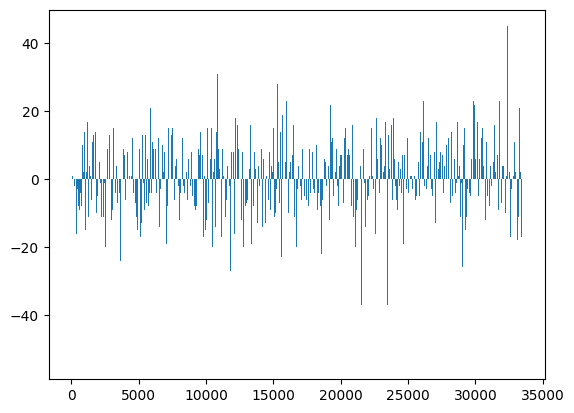

In [ ]:
plt.bar(np.arange(33482),y_pred-y_test)
print(max(y_pred-y_test))